In [36]:
from hybra import HybrA
import soundfile

import torch

In [44]:
learned_weights = torch.load("aud_bias_final_400.pth", map_location="cpu")['model_state_dict']['filterbank.encoder.weight']


In [46]:
signal, fs = soundfile.read("signal.wav")
signal = torch.tensor(signal[:5*fs,0], dtype=torch.float32)[None,...]
filterbank = HybrA(path_to_auditory_filter_config="auditory_filters_speech.pth")

filterbank.encoder.weight = torch.nn.Parameter(learned_weights)

In [47]:
signal.shape

torch.Size([1, 80000])

In [48]:
out = filterbank(signal)
out.shape

torch.Size([1, 256, 622])

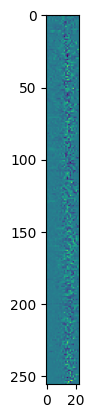

In [49]:
plt.imshow(filterbank.encoder.weight.detach().squeeze(1))

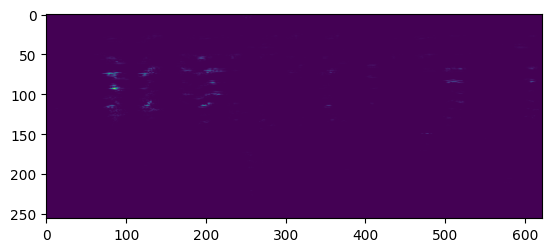

In [50]:
import matplotlib.pyplot as plt

plt.imshow(out.detach().numpy()[0])


In [51]:
reconstruction = filterbank.decoder(out)
reconstruction.shape

torch.Size([1, 80000])

In [56]:
soundfile.write("reconstruction.wav", reconstruction[0].detach().numpy(), fs)

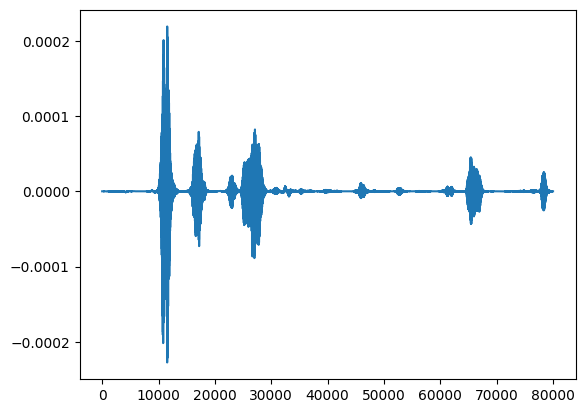

In [55]:
import matplotlib.pyplot as plt

# plt.plot(signal[0])
plt.plot(reconstruction[0].detach().numpy())

In [11]:
signal.shape

torch.Size([1, 80000])

In [57]:
filterbank_with_skip_connection = HybrA(path_to_auditory_filter_config="auditory_filters_speech.pth", skip_connection=True)

In [58]:
out_skip_connection = filterbank_with_skip_connection(signal)

In [59]:
reconstruction_with_skip_connection = filterbank_with_skip_connection.decoder(out_skip_connection)

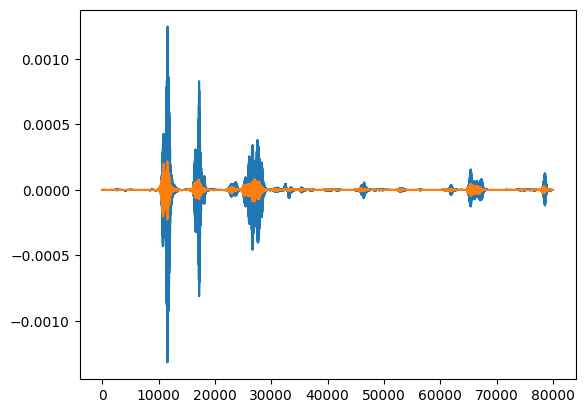

In [62]:
plt.plot(reconstruction_with_skip_connection.detach()[0])
plt.plot(reconstruction.detach()[0])

In [32]:
reconstruction_with_skip_connection.shape

torch.Size([1, 80000])

In [65]:
soundfile.write('reconstruction skip connnection.wav', 1000*reconstruction_with_skip_connection.detach()[0],fs)